# 선형 회귀 모델

In [1]:
import numpy as np
import matplotlib.pyplot as plt

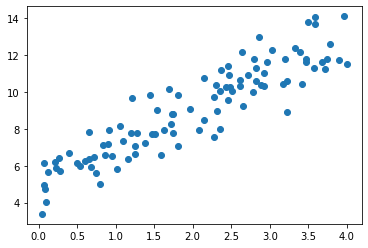

In [2]:
np.random.seed(0)

w0 = 5
w1 = 2
noise = np.random.randn(100, 1)

x = 4 * np.random.rand(100, 1)
y = w1 * x + w0 + noise

plt.scatter(x, y)

In [5]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x, y)

print("y절편(w0): ", linear_reg_model.intercept_)
print("회귀 계수(w1): ", linear_reg_model.coef_)

y절편(w0):  [5.09772262]
회귀 계수(w1):  [[1.9808382]]


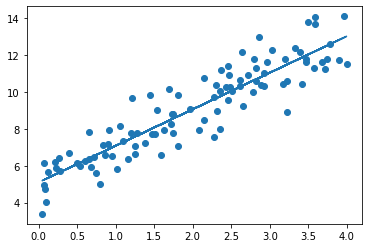

In [6]:
y_pred = linear_reg_model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred)

# Decision tree
불순도(엔트로피 or 지니)를 최소화하는 방향으로 분할

**DecisionTreeClassifier**

* criterion : 분할 시 사용할 불순도 측정 지표
    * 'gini' - 지니 불순도를 활용해 분할(default)
    * 'entropy' - 정보이득(1-entropy) 방법으로 분할
  
  
* max_depth : 트리의 최대 깊이
    * max_depth를 규정하지 않으면 모든 말단 노드의 불순도가 0이 되거나,  
    노드에 있는 데이터 수가 min_samples_split보다 작을 떄까지 트리 깊이가 깊어짐
    * default : None
  
  
* min_samples_split : 노드 분할을 위한 최소 데이터 개수
    * 노드 내 데이터 개수가 이 값보다 작으면 더 이상 분할하지 않음
    * 정수형으로 전달 - 최소 데이터 개수
    * 실수형으로 전달 - 전체 데이터 개수 중 최소 데이터 개수 비율
    * default : 2
  
  
* min_samples_leaf : 말단 노드가 되기 위한 최소 데이터 개수
    * 분할 후 노드 내 데이터 개수가 이 값보다 작으면 더이상 분할하지 않음
    * default : 1
    

* max_features : 분할에 사용할 피처 개수
    * 정수형 - 피처 개수
    * 실수형 - 전체 피처 개수 중 분할에 사용될 피처 개수 비율
    * 'auto' or 'sqrt' - sqrt(전체 피처 개수)
    * 'log2' - log2(전체 피처 개수)
    * None - 전체 피처(default)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [9]:
cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'],
                                                   stratify = cancer_data['target'],
                                                   test_size = 0.4,
                                                   random_state = 42)

In [10]:
decisiontree = DecisionTreeClassifier(random_state = 42)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
accuracy = decisiontree.score(X_test, y_test)
print(f'결정 트리 정확도: {accuracy: .3f}')

결정 트리 정확도:  0.930


# 앙상블 학습
다양한 모델이 내린 예측 결과를 결합하는 기법

* Voting - 개별 결과를 종합해 최종 결과를 결정하는 방식
    * Hard Voting - 다수결 투표 방식으로 최종 예측값을 정함
    * Soft Voting - 개별 예측 확률들의 평균을 최종 예측 확률로 정함
    
  
* Bagging - 개별 모델로 예측한 결과를 결합해 최종 예측을 정하는 방식(개별 모델이 서로 다른 샘플링 데이터를 활용)
    * 전체 훈련 데이터셋에서 무작위 샘플링한 데이터로 개별 모델을 훈련
    * 훈련된 개별 모델로 결과 예측
    * 각 모델이 예측한 값들을 Voting 하여 최종 예측값 구함
    * ex) 랜덤포레스트
    
     
* Boosting - 가중치를 활용해 분류 성능이 약한 모델을 강하게 만드는 기법
    * 배깅은 결정 트리 각각이 서로 독립적으로 결과를 예측한 다음 보팅하여 최종 결과를 도출함  
    하지만 부스팅에서는 '모델 간 협력'이 이루어짐, 이전 모델이 잘못 예측한 데이터에 가중치를 부여하고  
    잘못 예측한 데이터에 더 집중해 훈련함
    
    * ex) XGBoost, LightGBM

# Random Forest
결정 트리를 배깅 방식으로 결합한 모델

**RandomForestClassifier**

* n_estimators: 랜덤 포레스트를 구성할 결정 트리 개수
    * default - 100
* 나머지 파라미터들 - Decision Tree와 같음

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'],
                                                   stratify = cancer_data['target'],
                                                   test_size = 0.4,
                                                   random_state = 42)

In [14]:
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
accuracy = randomforest.score(X_test, y_test)
print(f'랜던 포레스트 정확도 : {accuracy:.3f}')

랜던 포레스트 정확도 : 0.939


# XGBoost
트리 기반 부스팅 알고리즘  
 
랜덤 포레스트는 결정 트리를 병렬로 배치하지만, XGBoost는 직렬로 배치해 사용.  
랜덤 포레스트는 배깅 방식, XGBoost는 부스팅 방식, 부스팅 방식이라 직전 트리가 예측한 값을 다음 트리가 활용해서 예측값 수정

파이썬 래퍼 XGBoost를 사용하려면 DMatrix 객체를 활용해 XGBoost 전용 데이터셋을 만들어야함    

**xgboost.DMatrix()**  
* data - xgboost.DMatrix용 데이터셋
    * numpy array, pandas Dataframe, scipy.sparse, os.PathLIke, 문자열 타입 전달 가능
* label - 타깃값
    * 배열 타입 전달

**XGBoost**
* booster - 부스팅 알고리즘
    * 트리 기반 모델일 떄는 'gbtree', 'dart' 선택, 선형 모델일때는 'gblinear'를 선택  
    ('gblinear'는 성능이 나빠 잘 쓰지 않음, 'dart'는 드롭아웃을 적용한 'gbtree'라고 보면 됨)


* objective - 훈련 목적
    * regression - 'reg:squarederror'(default)
    * 이진 분류 - 'binary:logistic'
    * 다중 분류 - 'mmulti:softmax'
    * 확률값 구하는 다중분류 : 'multi:softprob'
   
   
* eta(learning_rate) - 학습률(부스팅 스텝을 반복하면서 모델을 업데이트하는 데 사용되는 비율)
    * 일반적으로 0.0001~0.1 사이 값 사용(default = 0.3)
   
   
* max_depth - 개별 트리의 최대 깊이
    * 과대 적합을 제어하는 파라미터
    * 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합될 우려가 있음
    * 일반적으로 3~10 사이의 값 사용(default = 6)
    

* subsample - 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
    * 일반적으로 0.6~1 사이의 값 사용(default = 1)
   
   
* colsample_bytree - 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
    * 일반적으로 0.6~1 사이의 값 사용(default = 1)
    
    
* alpha - L1 Regularization
    * default = 0
    
    
 * lambda - L2 Regularization
     * 파이썬 lambda 함수와 혼동을 피해 reg_lambda를 주로 사용
     * default = 1
     

* gamma(min_split_loss) - 말단 노드가 분할하기 위한 최소 손실 감소 값
    * 0 이상 값으로 설정할 수 있음
    *  손실 감소가 gamma보다 크면 말단 노드를 분할
    * 값이 클수록 과대적합 방지 효과
    
    
* min_child_weight - 과대적합 방지를 위한 값
    * 0 이상 값으로 설정할 수 있음
    * 값이 클수록 과대적합 방지 효과
    * default = 1
    
    
* scale_pos_weight - 불균형 데이터 가중치 조정값
    * 타깃값이 불균형할 때 양성값에 scale_pos_weight만큼 가중치를 줘서 균형을 맞춤
    * 일반적으로 scale_pos_weight값을 (음성 타깃값 개수 / 양성 타깃값 개수)로 설정
    * default = 1
    

* random_state

**xgboost.train()**

* params - XGBoost 모델의 하이퍼파라미터 목록
* dtrain - 훈련 데이터셋(xgboost.DMatrix 타입으로 전달)
* num_boost_round - 부스팅 반복 횟수
    * 정수형 타입, 클수록 과대적합 우려
    * num_boost_round를 늘리면 learning_rate를 줄여야함
    * default = 10
* evals - 모델 성능 평가용 검증 데이터셋
    * (DMatrix, 문자열) 쌍들을 원소로 갖는 리스트 타입으로 전달, 검증 데이터셋 이름을 원하는 대로 문자열에 정하면 됨
* feval - 검증용 평가지표
    * 예측값과 실제값을 파라미터로 전달받아, 평가지표명과 평가점수를 반환하는 함수여야함
* maximize - feval 평가점수면 높으면 좋은지 여부(True or False)
* early_stoppping_rounds - 조기 종료 조건
* verbose_eval - 성능 점수 로그 설정 값(True or False or Int)
    * True로 설정하면 매 부스팅 스텝마다 평가점수를 출력
    * 정수면 평가점수를 매 verbose_eval 스텝마다 출력

# LightGBM
트리기반 그리고 말단 노드 중심으로 예측 오류를 최소화하게끔 분할 -> 균형 유지를 위한 추가 연산 x -> 훈련 속도 빨라짐, 과대 적합 쉬움

파이썬 래퍼 LightGBM를 사용하려면 lightgbm.Dataset()으로 전용 데이터셋을 만들어야함

**lightgbm.Dataset()**
* data - lightgbm.Dataset용 데이터셋
* label - 타깃 값

**LightGBM**

* boosting_type - 부스팅 알고리즘
    * 'gbdt', 'dart', 'goss', 'rf'가 있음
    

* objective - 훈련목적
    * 'regression', 'binary', 'multiclass'가 있음
    

* learning_rate(eta) - 학습률


* num_leaves - 개별 트리가 가질 수 있는 최대 말단 노드 개수(default=31)


* max_depth - 개별 트리의 최대 깊이
    * LightGBM은 말단 노드 중심으로 분할하므로 max_depth를 균형 중심 분할 모델(XGBoost)보다 크게 잡는게 좋음
    * default = -1(제한 없음)
    
* bagging_fraction(subsample) - 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
    * 배깅을 활성화하려면 bagging_freq 파라미터를 0이 아닌 값으로 설정해야함
    
    
* freature_fraction(colsample_bytree) - 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율


* lambda_l1(reg_alpha) - L1 regularization


* lambda_l2(rag_lambda) - L2 regularization


* min_child_samples - 말단 노드가 되기 위해 필요한 최소 데이터 개수
    * 값이 클수록 과대적합 방지(default=20)
    
    
* bagging_freq(subsample_freq) - 배깅 수행 빈도
    * 몇번의 반복마다 배깅을 수행할지 결정
    * 0 전달 시 배깅 x (default)
    * 1 전달 시 매 반복마다 트리가 새로운 샘플링 데이터로 학습
    
    
* force_row_wise - 메모리 용량이 충분하지 않을 떄 메모리 효율을 높이는 파라미트
    * True 전달 시 메모리 효율 좋아짐
    
    
* random_state
    

**lightgbm.train()**

* params - LightGBM 모델의 하이퍼파라미터 목록(딕셔너리 형태로 전달)
* train_set - 훈련 데이터셋(lightgbm.Dataset 타입으로 전달)
* num_boosts_round - 부스팅 반복 횟수(default = 100)
* valid_sets - 모델 성능 평가용 검증 데이터셋
* feval - 검증용 평가 지표(사용자 정의 함수)
     * 예측값과 실제값을 파라미터로 전달받아, 평가지표명, 평가점수, 평가점수가 크면 좋은지 여부 반환하는 함수여야함
* categorical_feature - 범주형 데이터 파라미터
    * 이 파라미터에 전달된 데이터를 범주형 데이터로 인식
    * 아무것도 전달하지 않으면 category타입을 범주형 데이터로 인식
* early_stopping_rounds - 조기종료 조건
* verbose_eval - 성능 점수 로그 설정 값